In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

In [2]:
gaps_df = pd.read_table('/home/groups/dpwall/briannac/general_data/reference_genomes/hg38/hg38_agp_file.tsv', header=None)
gaps_df.columns = ['chrom', 'start', 'stop', 'idx', 'type', 'ncbi_idx', 'location', 7, 8]
gaps_df = gaps_df[gaps_df.type=='N']

In [3]:
sizes_df = pd.read_table('/home/groups/dpwall/briannac/general_data/reference_genomes/hg38_chromsome_sizes.txt', header=None)
sizes = [int(s.replace(',','')) for s in sizes_df[2]]
starts = [np.sum(sizes[:i]) for i in range(23)] + [3041559849]

def loci_linear_idx(chrom, loci):
    chrom=int(chrom)
    if chrom==24: chrom=23
    return starts[chrom-1]+loci

In [ ]:
localized = pd.read_table('/home/groups/dpwall/briannac/alt_haplotypes/intermediate_files/localize/unmapped/localized.tsv', comment='#')
localized.columns = ['median_of_nonzeros','prevalence','chrom_pred','start_pred','end_pred']
print(100*np.mean(~np.isnan(localized.chrom_pred)),'% localized')
plt.hist(np.log10(localized.end_pred-localized.start_pred), bins=100)
plt.show()
Counter(localized.chrom_pred).most_common(5)


93.73570065538608 % localized


/home/users/briannac/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/users/briannac/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


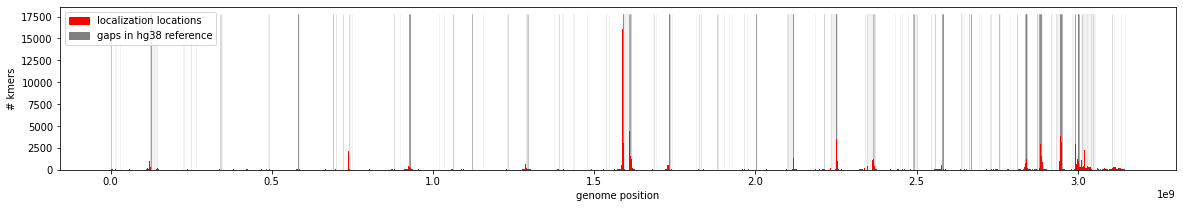

In [21]:
f, ax = plt.subplots(figsize=(20,3))
localized = localized[~np.isnan(localized.chrom_pred)]
linear_locs = [loci_linear_idx(chrom_pred, start_pred) for chrom_pred, start_pred in zip(localized.chrom_pred, localized.start_pred)]
nbins = plt.hist(linear_locs, bins=1000, color='r')
gaps_df = pd.read_table('/home/groups/dpwall/briannac/general_data/reference_genomes/hg38/hg38_agp_file.tsv', header=None)
gaps_df.columns = ['chrom', 'start', 'stop', 'idx', 'type', 'ncbi_idx', 'location', 7, 8]
gaps_df = gaps_df[[len(c)<10 for c in gaps_df.chrom]]
gaps_df = gaps_df[gaps_df.type=='N']
gaps_df.chrom = [c.replace('X', '23').replace('Y', '24') for c in gaps_df.chrom]
for start, stop, chrom in zip(gaps_df.start, gaps_df.stop, gaps_df.chrom):
    r = Rectangle(xy=(loci_linear_idx(chrom.replace('chr', ''), start), 0),
                  height=1.1*max(nbins[0]), width=stop-start, color='grey', alpha=.1)
    ax.add_patch(r)
    
red_patch = mpatches.Patch(color='red')
grey_patch = mpatches.Patch(color='grey')

p = plt.hist(linear_locs, bins=1000, color='r')
plt.legend([red_patch, grey_patch], ['localization locations', 'gaps in hg38 reference'])
#plt.xlim(0,stop)
plt.yscale('symlog', )
plt.ylabel('# kmers')
plt.xlabel('genome position')
plt.show()



In [30]:
sizes_df = pd.read_table('/home/groups/dpwall/briannac/general_data/reference_genomes/hg38_chromsome_sizes.txt', header=None)
sizes = [int(s.replace(',','')) for s in sizes_df[2]]
starts = [np.sum(sizes[:i]) for i in range(23)] + [3041559849]

f, ax = plt.subplots(figsize=(20,.5))
for i in range(23):
    if i%2==0: color=(.8,.8,.8)
    else: color=(.4,.4,.4)
    chrom=str(i+1)
    if chrom==23: chrom='X'
    plt.text(x=np.mean(starts[i:i+2]), y=.4, s=chrom, fontsize=9, ha='center')#, rotation=45, va='top', ha='right')
    plt.hlines(xmin=starts[i], xmax=starts[i+1], y=.6, color=color, linestyle='-', linewidth=7)
plt.xlim(0,starts[-1]+1e8)
ax.axis('off')
plt.ylim(.4,.6)
plt.tight_layout()
plt.show()

In [29]:
localized[localized['chrom_pred']==chrom].sort_values('start_pred').iloc[:100].index

Int64Index([31697, 19402, 55645, 71715, 12080, 72096, 32841,  1017, 42133,
            56628, 56647,   111, 56297, 16208, 20319, 77871, 94353, 66363,
            37899, 98272, 18312, 45328, 20326,  7394, 62779, 55493, 36137,
            92959, 94704, 29404, 60081, 86416, 65916, 45621,  6699, 30060,
             4968, 77714, 89551, 21955, 48927, 27093, 52945, 30937, 39619,
            93048, 83349, 76900, 66312, 14865, 46974, 80446, 29884,  4405,
            69861, 17728, 82129, 59738, 63199,   377, 27548, 98812, 73430,
            10895, 81430, 23859, 38574,  7503, 41596, 66612, 70101, 79693,
            94684, 47263, 43664, 64970,  3572, 83388, 26649, 76596, 70911,
            88077, 80738, 18132,  3214, 80230, 29841, 41331,  5009, 85623,
             5369, 68911, 31514, 28019, 30945, 47855, 92367, 62534,  3400,
            34596],
           dtype='int64')

In [30]:
chrom=9
kmer_seqs = pd.read_table('/home/groups/dpwall/briannac/alt_haplotypes/intermediate_files/family_likelihoods/kmers_unmapped_prev_and_median_filt.txt', 
                          nrows=100000, header=None)
kmer_seqs.loc[localized[localized['chrom_pred']==chrom].sort_values('start_pred').iloc[:100].index].values

array([['ACCCGAGTGTAATGGCATGGAATGGAACGGAATGGAATGGGATGGAATGGAATGGTACGGAATAGAATGGAATGGAATGAAATGGAATAGAAAGGAATGG'],
       ['CGAGTGGAATGGATTCGAATGGAATGGAATTGAATGGAGTGGACTGGAAAAAACTGGAATCGAATGGATTGGGAATGAATGGAATGGAATGGAATGCACA'],
       ['ACCCGAATGGAATGGAATGGATTGGAATGGAATGGAATGGAATCAAGCCCAGCGTAAAGGAATGGAATGGAATGGATTGGACTGGAATTTAATGGAATGG'],
       ['AATAGAAGGGAATGGTTTCGAGTGGAATGAAAAGGAATGGAATCAACCAGAGTGGAATGGAATGGAATCGAGTGGAATGGAATGCAATCGAATGGAATGG'],
       ['TGGAATTAACACGAATAGAATGGAATGGAATGGATCGGAATGGAATGGAATCAACGTGAGTGCTGGGGATTGGAATGGAATGGAATGCAATGGAATGGAA'],
       ['ATTCCGGAAGATTCCATTCCATTGCATTCCATTCCATTCCATTCCCCTGCACTCGCGTTGATTCCATTCCATTCCATTCCATTCCATCCCATTCCATCCC'],
       ['AATGGAATAGAATGAAATGGAATTGTGTGGAATGGAATGGAATTGAATGGAGTGTAAAAGAATTGAATAGAATCAACCCGAATAGAATGGAATGTAATGG'],
       ['CCATTCCATTACATTCGGATTGATTCTATTCAACTCCCTTACATTCCATTACATTCCATTCCATTCGGGTTGTTCCATTCCATTCCATTCCATTCCCCTC'],
       ['ATACCATTCCATTCCATTGTATGCCATTCCATTCCATTCCACTCGGGTTCATTCCATTCCATTCCACTCCATTCCTTTACATTCCAT

In [25]:
kmer_seqs

,0
0,CATCCCATTCCGTTCCGTTGCATTCCATTCCATTACATTTGGATTG...
1,ATAGAATATATGATACATGATATATATGATATTTAATATAACATAA...
2,ACTATATGTCATATTGTATAAATATAAAACTTATATATTATCAATT...
3,GCATTCTTTATTTTACATGTAATAAATTATACATTATAGGGAACAT...
4,AATGGAATGGTATGGAAAGGAAAGGAATGTAATTGAATAGAATGGA...
...,...
9995,TATAAAAGTATATATAACATAATATATAGTTATATATAATATATTA...
9996,GAGTGGAATGGAGTGTAGTGGAATGGAGTGGAGTGGAATGGAGCGG...
9997,ATTTTACATGTAATAAATTATACATTATAGGTAACATAGTATATAG...
9998,ATTCGGGTAGTTTCCATTGCATTCCATTCCATTCCTCTCTGTTCCA...


In [65]:
kmer_seqs

,0
0,CATCCCATTCCGTTCCGTTGCATTCCATTCCATTACATTTGGATTG...
1,ATAGAATATATGATACATGATATATATGATATTTAATATAACATAA...
2,ACTATATGTCATATTGTATAAATATAAAACTTATATATTATCAATT...
3,GCATTCTTTATTTTACATGTAATAAATTATACATTATAGGGAACAT...
4,AATGGAATGGTATGGAAAGGAAAGGAATGTAATTGAATAGAATGGA...
...,...
9995,TATAAAAGTATATATAACATAATATATAGTTATATATAATATATTA...
9996,GAGTGGAATGGAGTGTAGTGGAATGGAGTGGAGTGGAATGGAGCGG...
9997,ATTTTACATGTAATAAATTATACATTATAGGTAACATAGTATATAG...
9998,ATTCGGGTAGTTTCCATTGCATTCCATTCCATTCCTCTCTGTTCCA...


In [1]:
chrom=14
f, ax = plt.subplots(figsize=(20,3))
nbins = plt.hist(localized[localized['chrom_pred']==chrom][3], bins=1000, color='blue')
gaps_df = pd.read_table('/home/groups/dpwall/briannac/general_data/reference_genomes/hg38/hg38_agp_file.tsv', header=None)
gaps_df.columns = ['chrom', 'start', 'stop', 'idx', 'type', 'ncbi_idx', 'location', 7, 8]
gaps_df = gaps_df[gaps_df.type=='N']
gaps_df = gaps_df[gaps_df.chrom==('chr'+str(chrom))]
#plt.hist(gaps_df.start, bins=1000)
for start, stop in zip(gaps_df.start, gaps_df.stop):
    r = Rectangle(xy=(start, 0), height=max(2*nbins[1]), width=stop-start, color='grey', alpha=.3)
    ax.add_patch(r)
nbins = plt.hist(localized[localized['chrom_pred']==chrom][3], bins=1000, color='blue')

#plt.xlim(0,stop)
plt.show()

NameError: name 'plt' is not defined

In [12]:
BAM_MAPPINGS_FILE = '/home/groups/dpwall/briannac/general_data/bam_mappings.csv'
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
bam_mappings = bam_mappings[bam_mappings['status']=='Passed_QC_analysis_ready']

In [41]:
bam_mappings = bam_mappings.drop('09C86428')

,status,participant_id,family,AGRE Blood,NIMH Blood,relationship,FatherID,MotherID,sex_numeric,derived_affected_status,...,number_of_indels,number_of_homozygous_snvs,number_of_heterozygous_snvs,het_to_hom_ratio,ti_tv_ratio,dbsnp_overlap,concordance_with_genotyping_chip,cryptic_relatedness_check,family_based_average_coverage,familial_relationship_check
sample_id,,,,,,,,,,,,,,,,,,,,,
02C10540,Passed_QC_analysis_ready,AU1005201,AU1005,HI2393,02C10540,father,0,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02C10541,Passed_QC_analysis_ready,AU1005202,AU1005,HI2394,02C10541,mother,0,0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02C10542,Passed_QC_analysis_ready,AU1005302,AU1005,HI2395,02C10542,sibling,AU1005201,AU1005202,2.0,broad-spectrum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02C10543,Passed_QC_analysis_ready,AU1005301,AU1005,HI2396,02C10543,sibling,AU1005201,AU1005202,1.0,autism,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02C10702,Passed_QC_analysis_ready,AU1004202,AU1004,HI2397,02C10702,mother,0,0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MH0143008,Passed_QC_analysis_ready,AU3859201,AU3859,HI11780,MH0143008,father,0,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MH0143009,Passed_QC_analysis_ready,AU3859202,AU3859,HI11781,MH0143009,mother,0,0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MH0143013,Passed_QC_analysis_ready,AU3859303,AU3859,HI11784,MH0143013,sibling,AU3859201,AU3859202,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
